In [1]:
import numpy as np
import matplotlib.pyplot as plt
from phoebe.dependencies import distl
import phoebe
from astropy import units as u
from astropy import constants as c
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
%matplotlib inline

### System parameters and PHOEBE setup

In [3]:
lc_res = {
    'period@binary': phoebe.gaussian(51.418877, 2.6e-5),
    'requivsumfrac': phoebe.gaussian(0.070419, 0.0001),
    'requivratio': phoebe.gaussian(0.4659, 0.0031),
    'incl@binary': phoebe.gaussian(86.3632, 0.008),
    'sma@primary': phoebe.gaussian(44.521,0.07),
    'ld_coeffs[0]@primary': phoebe.gaussian(0.072,0.081),
    'ld_coeffs[1]@primary': phoebe.gaussian(0.487,0.12),
    'ld_coeffs[0]@secondary': phoebe.gaussian(0.365,0.126),
    'ld_coeffs[1]@secondary': phoebe.gaussian(0.121,0.194),
    'vgamma': phoebe.gaussian(-11.7,0.022),
    'teff@primary': phoebe.gaussian(9809,100),
    'logg@primary': phoebe.gaussian(3.63,0.20),
    'teffratio': phoebe.gaussian(1.051,0.009),
    'syncpar@primary': phoebe.gaussian(6.35,0.6),
    'syncpar@secondary': phoebe.gaussian(17.7,8),
    'q@binary': phoebe.gaussian(0.6653,0.007),
    'esinw': phoebe.gaussian(0.15586, 0.001),
    'ecosw': phoebe.gaussian(0.395055, 6.5e-5),
    'pblum@primary': phoebe.gaussian(10.216,0.032),
    'sigmas_lnf@lc01': phoebe.gaussian(-8.445, 0.016),
    'sigmas_lnf@primary@rv01': phoebe.gaussian(-4.89, 0.15),
}

In [25]:
times = np.linspace(0,52,200)

In [26]:
b = phoebe.default_binary()
b.add_dataset('lc', times=times, passband='TESS:T')
b.add_compute('ellc')
b.set_value_all('ld_mode', value='manual')
b.set_value_all('ld_func', value='square_root')
b.set_value_all('distortion_method', compute='ellc01', value='roche')
b.set_value_all('rv_method', compute='ellc01', value='flux-weighted')
# b.set_value_all('irrad_method', compute='ellc01', value='none')

b.add_constraint('requivsumfrac')
b.add_constraint('requivratio')
b.add_constraint('teffratio')

b.flip_constraint('requivsumfrac', solve_for='requiv@primary')
b.flip_constraint('requivratio', solve_for='requiv@secondary')
b.flip_constraint('teffratio', solve_for='teff@secondary')

b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')

b.flip_constraint('sma@primary', solve_for='sma@binary')

b.set_value_all('gravb_bol', 1.0)
b.set_value_all('irrad_frac_refl_bol', 1.0)

In [27]:
ph_params = ['period@binary', 'requivsumfrac', 'requivratio', 
             'incl@binary', 'esinw', 'ecosw', 'teff@primary', 'teffratio', 'q@binary',
             'sma@primary', 'vgamma', 'syncpar@primary', 'syncpar@secondary', 'pblum@primary',
            ]
for twig in ph_params:
    b.set_value(twig, lc_res[twig].loc)
    
b.set_value_all('ld_coeffs@primary', [0.072,0.487])
b.set_value_all('ld_coeffs@secondary', [0.365,0.121])

### ellc backend - spherical stars

100%|██████████| 1/1 [00:00<00:00, 57.28it/s]


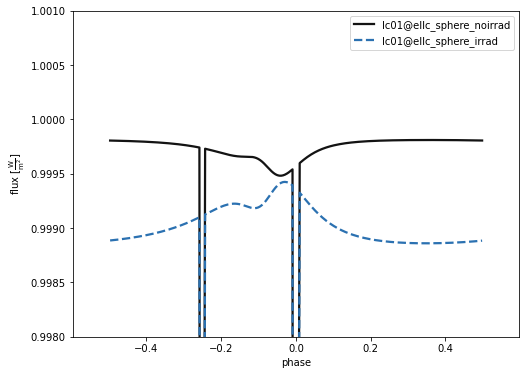

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [28]:
b.set_value_all('distortion_method', compute='ellc01', value='sphere')
b.set_value_all('irrad_method', compute='ellc01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_sphere_noirrad', overwrite=True)

b.set_value_all('irrad_method', compute='ellc01', value='lambert')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_sphere_irrad', overwrite=True)

b.plot(x='phase', ylim = (0.998,1.001), legend=True, show=True)

### ellc backend - roche stars

100%|██████████| 1/1 [00:00<00:00, 58.25it/s]


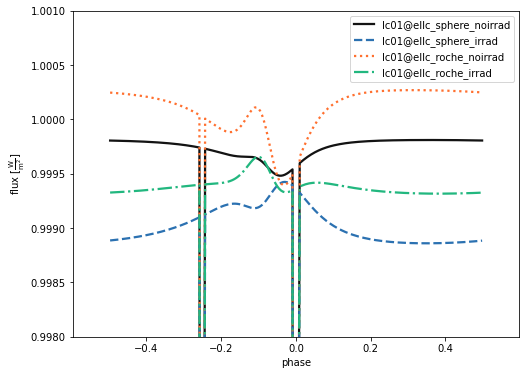

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [29]:
b.set_value_all('distortion_method', compute='ellc01', value='roche')
b.set_value_all('irrad_method', compute='ellc01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_roche_noirrad', overwrite=True)

b.set_value_all('irrad_method', compute='ellc01', value='lambert')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_roche_irrad', overwrite=True)

b.plot(x='phase', ylim = (0.998,1.001), legend=True, show=True)

### phoebe backend - spherical stars

100%|██████████| 200/200 [02:58<00:00,  1.12it/s]


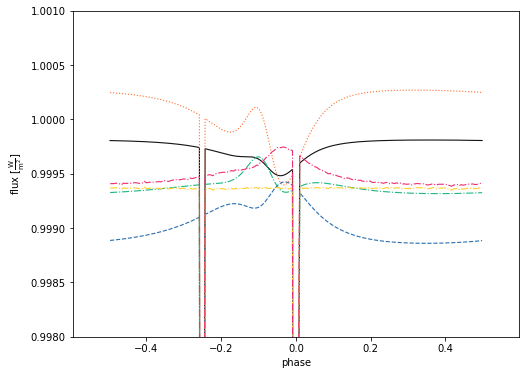

(<autofig.figure.Figure | 1 axes | 6 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [30]:
b.set_value_all('distortion_method', compute='phoebe01', value='sphere')
b.set_value_all('irrad_method', compute='phoebe01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_sphere_noirrad', overwrite=True)

b.set_value_all('irrad_method', compute='phoebe01', value='horvat')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_sphere_irrad',  overwrite=True,)

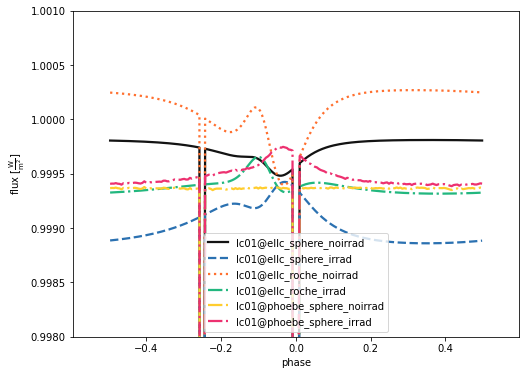

(<autofig.figure.Figure | 1 axes | 6 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [31]:
b.plot(x='phase', ylim = (0.995,1.001), legend=True, show=True)

### phoebe backend - roche stars

In [36]:
b.set_value_all('distortion_method', compute='phoebe01', value='roche')
b.set_value_all('irrad_method', compute='phoebe01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_roche_noirrad', overwrite=True)

b.set_value_all('irrad_method', compute='phoebe01', value='horvat')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_roche_irrad', overwrite=True)

100%|██████████| 200/200 [03:08<00:00,  1.06it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

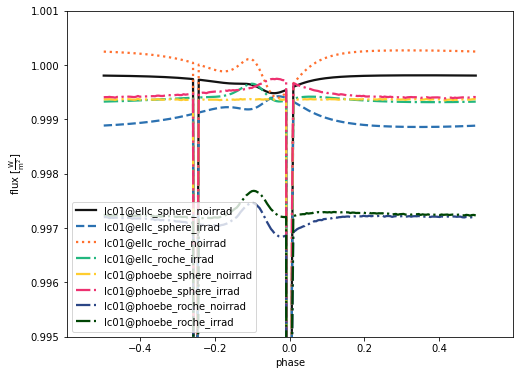

(<autofig.figure.Figure | 1 axes | 8 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [38]:
b.plot(x='phase',ylim = (0.995,1.001), legend=True, show=True)

In [39]:
phases = b.to_phase(times)
s = np.argsort(phases)

ellc_sphere_noirrad = b.get_value('fluxes', model = 'ellc_sphere_noirrad')[s]
ellc_sphere_irrad = b.get_value('fluxes', model = 'ellc_sphere_irrad')[s]
ellc_roche_noirrad = b.get_value('fluxes', model = 'ellc_roche_noirrad')[s]
ellc_roche_irrad = b.get_value('fluxes', model = 'ellc_roche_irrad')[s]


phoebe_sphere_noirrad = b.get_value('fluxes', model = 'phoebe_sphere_noirrad')[s]
phoebe_sphere_irrad = b.get_value('fluxes', model = 'phoebe_sphere_irrad')[s]
phoebe_roche_noirrad = b.get_value('fluxes', model = 'phoebe_roche_noirrad')[s]
phoebe_roche_irrad = b.get_value('fluxes', model = 'phoebe_roche_irrad')[s]

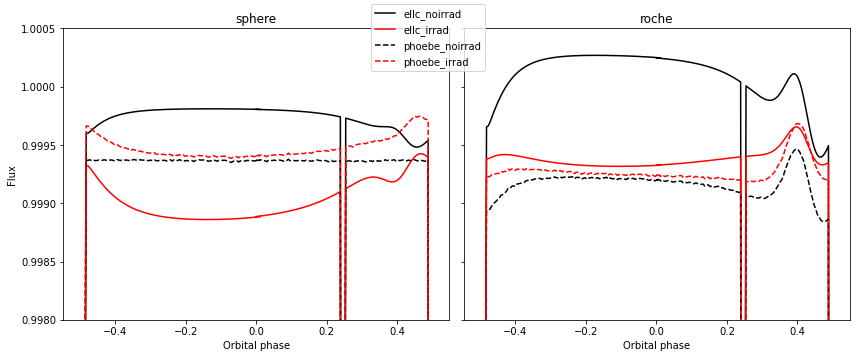

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(phases, ellc_sphere_noirrad, 'k-', label='ellc_noirrad')
axes[0].plot(phases, ellc_sphere_irrad, 'r-', label='ellc_irrad')
axes[0].plot(phases, phoebe_sphere_noirrad, 'k--', label='phoebe_noirrad')
axes[0].plot(phases, phoebe_sphere_irrad, 'r--', label='phoebe_irrad')
axes[0].set_title('sphere')
axes[0].set_xlabel('Orbital phase')
axes[0].set_ylabel('Flux')
axes[0].set_ylim(0.998,1.0005)

axes[1].plot(phases, ellc_roche_noirrad, 'k-')
axes[1].plot(phases, ellc_roche_irrad, 'r-')
axes[1].plot(phases, phoebe_roche_noirrad+0.002, 'k--') #adding +0.002 to fix flux scaling (phoebe pblum makes it lower in this case)
axes[1].plot(phases, phoebe_roche_irrad+0.002, 'r--')
axes[1].set_title('roche')
axes[1].set_xlabel('Orbital phase')
axes[1].set_yticklabels([])
axes[1].set_ylim(0.998,1.0005)

fig.tight_layout()
fig.legend(loc='upper center')
fig.patch.set_facecolor('white')
fig.savefig('ellc_phoebe_irradiation.png', )